##EDA and Feature Engineering 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import gc

from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold

In [3]:
#pd.set_option('display.max_rows', None)
def show_all(df, nrow, ncol):
    with pd.option_context('display.max_rows', nrow, 'display.max_columns', ncol):
        display(df)

In [34]:
fci_df = pd.read_csv(r'C:\Users\nirav.gandhi\Desktop\data science\food forecasting\train_GzS76OK\fulfilment_center_info.csv')
mi_df = pd.read_csv(r'C:\Users\nirav.gandhi\Desktop\data science\food forecasting\train_GzS76OK\meal_info.csv')
train_df = pd.read_csv(r'C:\Users\nirav.gandhi\Desktop\data science\food forecasting\train_GzS76OK\train.csv')
test_df = pd.read_csv(r'C:\Users\nirav.gandhi\Desktop\data science\food forecasting\train_GzS76OK\test.csv')


In [6]:
# head of fulfilment_center_info file
fci_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
print("Shape of fulfilment_center_info :", fci_df.shape)

Shape of fulfilment_center_info : (77, 5)


In [8]:
# NaN values in fulfilment_center_info
fci_df.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [9]:
# head of meal_info file
mi_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
print("Shape of meal_info: ", mi_df.shape)

Shape of meal_info:  (51, 3)


In [11]:
# NaN values in meal_info
mi_df.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [12]:
# Head of Train file (historical demand data)
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [13]:
print("Shape of train: ", train_df.shape)

Shape of train:  (456548, 9)


In [14]:
# NaN values in train data
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [15]:
# Head of Test data
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [16]:
print("Shape of Test: ", test_df.shape)

Shape of Test:  (32573, 8)


In [17]:
# NaN values in test data
test_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

## EDA

### `fulfilment_center_info`

In [18]:
print("Total number of centers : ", fci_df['center_id'].nunique())

Total number of centers :  77


In [21]:
print("Types of centers : \n")
print(fci_df['center_type'].unique())

Types of centers : 

['TYPE_A' 'TYPE_B' 'TYPE_C']


In [22]:
print("Count of each center type : \n")
print(fci_df['center_type'].value_counts())

Types of centers : 

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64


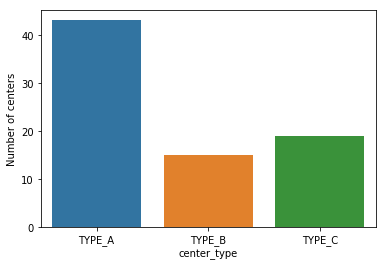

In [23]:
ax = sns.countplot(fci_df['center_type'])
ax.set(ylabel='Number of centers')
plt.show()

In [24]:
print("Total Number of cities: ", fci_df['city_code'].nunique())

Total Number of cities:  51


We have 77 stores in 51 cities, so some city have more than 1 center.

In [25]:
print("Total number of regions: ", fci_df['region_code'].nunique())

Total number of regions:  8


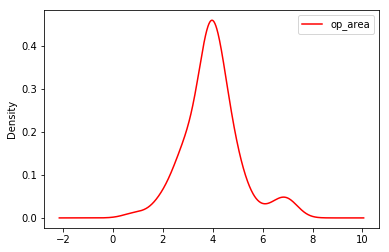

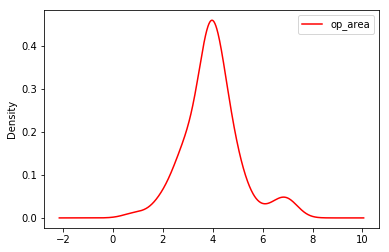

In [29]:
##df_fulfilment_center_info['op_area'].value_counts()
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fci_df['op_area'].plot(kind='kde', ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
fig

In [ ]:
#Majority of them are covering or operational in 2-6 KM

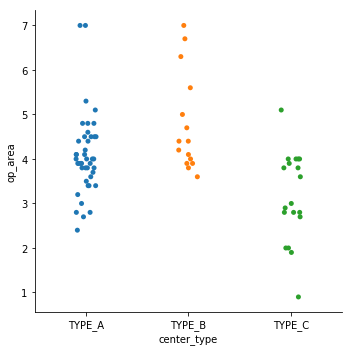

In [27]:
sns.catplot(x = 'center_type', y = 'op_area', data=fci_df)
plt.show()

In [35]:
fci_df['region_code'] = fci_df['city_code'].astype(str) + "_" + fci_df['region_code'].astype(str)
fci_df['region_code']

0     679_56
1     590_56
2     590_56
3     648_34
4     632_34
5     553_77
6     593_77
7     693_34
8     526_34
9     562_77
10    699_85
11    699_85
12    526_34
13    478_77
14    576_34
15    526_34
16    713_85
17    654_56
18    515_77
19    647_56
20    676_34
21    698_23
22    628_77
23    526_34
24    680_77
25    620_77
26    604_56
27    647_56
28    649_34
29    596_71
       ...  
47    695_77
48    602_34
49    526_34
50    522_56
51    703_56
52    526_34
53    651_77
54    638_56
55    590_56
56    590_56
57    485_77
58    685_56
59    461_34
60    702_35
61    615_34
62    590_56
63    590_56
64    614_85
65    599_56
66    579_56
67    517_56
68    609_93
69    517_56
70    658_34
71    561_77
72    590_56
73    604_56
74    614_85
75    676_34
76    638_56
Name: region_code, Length: 77, dtype: object

so in the one city there is not any centers which are in different regions.
so maybe region code will not be helpful.

In [36]:
fci_df.drop('region_code', axis=1, inplace=True)

### `meal_info`

In [37]:
print("Total number of different types of meal: ", mi_df['meal_id'].nunique())

Total number of different types of meal:  51


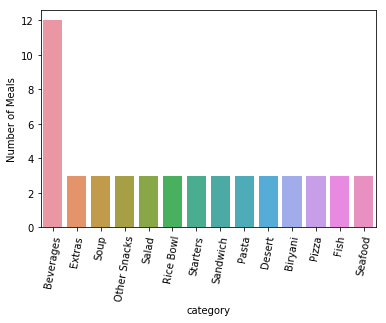

In [38]:
ax = sns.countplot(mi_df['category'])
ax.set(ylabel= "Number of Meals")
plt.xticks(rotation=80)
plt.show()

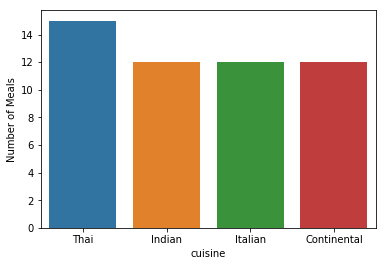

In [39]:
ax = sns.countplot(mi_df['cuisine'])
ax.set(ylabel= "Number of Meals")
plt.show()

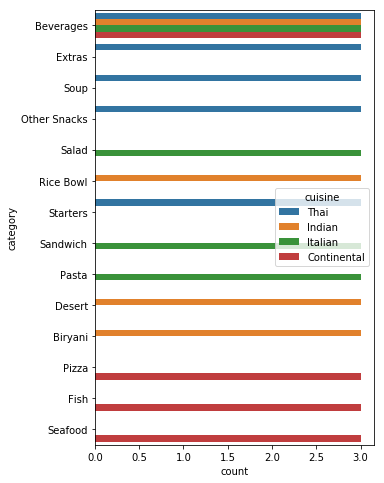

In [40]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = mi_df['category'], hue=mi_df['cuisine'], ax=ax)
plt.show()

### `Train (historical meal order data)`

In [41]:
train_df = pd.merge(train_df, fci_df, on='center_id')
test_df = pd.merge(test_df, fci_df, on='center_id')

train_df = pd.merge(train_df, mi_df, on='meal_id')
test_df = pd.merge(test_df, mi_df, on='meal_id')

In [42]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,TYPE_C,2.0,Beverages,Thai


In [43]:
train_df['b_c_p_diff'] = train_df['base_price'] - train_df['checkout_price']

In [44]:
test_df['b_c_p_diff'] = test_df['base_price'] - test_df['checkout_price']

#### Catboost model1 : LB : 158

In [45]:
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,center_type,op_area,category,cuisine,b_c_p_diff
0,1028232,146,55,1885,158.11,159.11,0,0,647,TYPE_C,2.0,Beverages,Thai,1.0
1,1262649,147,55,1885,159.11,159.11,0,0,647,TYPE_C,2.0,Beverages,Thai,0.0
2,1453211,149,55,1885,157.14,158.14,0,0,647,TYPE_C,2.0,Beverages,Thai,1.0
3,1262599,150,55,1885,159.14,157.14,0,0,647,TYPE_C,2.0,Beverages,Thai,-2.0
4,1495848,151,55,1885,160.11,159.11,0,0,647,TYPE_C,2.0,Beverages,Thai,-1.0


In [46]:
features0 = [col for col in test_df.columns if col not in ['id']]

In [47]:
features0

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'b_c_p_diff']

### Further analysis on entire data and feature engineering

In [62]:
all_df = train_df.append(test_df, sort=True).reset_index(drop=True)
all_df = all_df[train_df.columns]

In [63]:
all_df = all_df.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [64]:
all_df['last_pre_cp_diff'] = all_df['checkout_price'].shift(1) - all_df['checkout_price']

In [65]:
all_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine,b_c_p_diff,last_pre_cp_diff
0,1436842,1,10,1062,181.39,181.39,0,0,865.0,590,TYPE_B,6.3,Beverages,Italian,0.0,NaN
1,1205013,2,10,1062,183.36,182.36,0,0,782.0,590,TYPE_B,6.3,Beverages,Italian,-1.0,-1.97
2,1447751,3,10,1062,184.36,182.36,0,0,851.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.00
3,1014968,4,10,1062,182.36,183.36,0,0,1202.0,590,TYPE_B,6.3,Beverages,Italian,1.0,2.00
4,1003563,5,10,1062,183.39,181.39,0,0,958.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.03


In [66]:
for _, r in all_df.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    all_df.loc[(all_df['center_id']==r['center_id']) & (all_df['meal_id']==r['meal_id']) & (all_df['week']==r['week']), 'last_pre_cp_diff'] = all_df[(all_df['center_id']==r['center_id']) & (all_df['meal_id']==r['meal_id']) & (all_df['week']!=r['week'])]['last_pre_cp_diff'].mean()

In [67]:
all_df['price_increase'] = all_df['last_pre_cp_diff'] < 0

In [68]:
all_df['high_price_che_than_base'] = all_df['b_c_p_diff'] < 0

In [69]:
all_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine,b_c_p_diff,last_pre_cp_diff,price_increase,high_price_che_than_base
0,1436842,1,10,1062,181.39,181.39,0,0,865.0,590,TYPE_B,6.3,Beverages,Italian,0.0,0.125974,False,False
1,1205013,2,10,1062,183.36,182.36,0,0,782.0,590,TYPE_B,6.3,Beverages,Italian,-1.0,-1.970000,True,True
2,1447751,3,10,1062,184.36,182.36,0,0,851.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.000000,True,True
3,1014968,4,10,1062,182.36,183.36,0,0,1202.0,590,TYPE_B,6.3,Beverages,Italian,1.0,2.000000,False,False
4,1003563,5,10,1062,183.39,181.39,0,0,958.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.030000,True,True


In [70]:
all_df[all_df['last_pre_cp_diff'].isnull()]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine,b_c_p_diff,last_pre_cp_diff,price_increase,high_price_che_than_base
326977,1067161,85,101,1571,581.03,583.03,0,0,14.0,699,TYPE_C,2.8,Fish,Continental,2.0,NaN,False,False
423333,1488069,134,145,1571,602.43,601.43,0,0,42.0,620,TYPE_A,3.9,Fish,Continental,-1.0,NaN,False,True
424809,1408899,131,145,2104,437.53,435.53,0,0,68.0,620,TYPE_A,3.9,Fish,Continental,-2.0,NaN,False,True


Here we have some center-meal pair which has only occurred once, that's why we have NaN value for last_pre_cp_diff column for these 3 records. Let's put 0 for this.

In [71]:
all_df['last_pre_cp_diff'] = all_df['last_pre_cp_diff'].fillna(0)

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


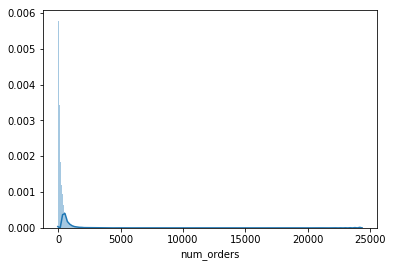

In [72]:
sns.distplot(all_df['num_orders'].dropna(), bins=500)
plt.show()

Target variable is highly skewd, so it's better if we use log of it for prediction.

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


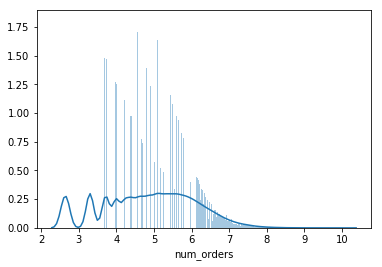

In [73]:
sns.distplot(np.log(all_df['num_orders'].dropna()), bins=500)
plt.show()

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


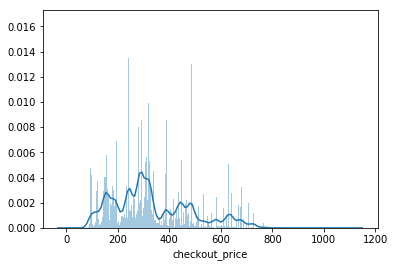

In [74]:
sns.distplot(all_df['checkout_price'], bins=500)
plt.show()

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


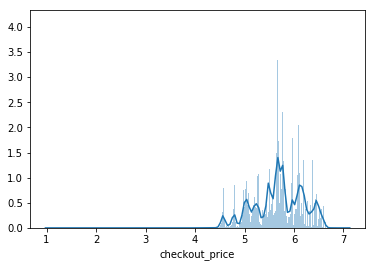

In [75]:
sns.distplot(np.log(all_df['checkout_price']), bins=500)
plt.show()

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


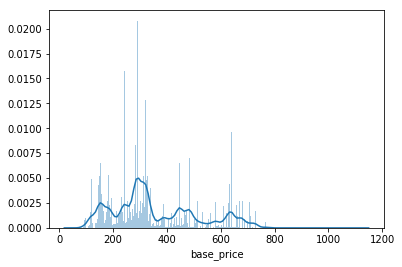

In [76]:
sns.distplot(all_df['base_price'], bins=500)
plt.show()

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


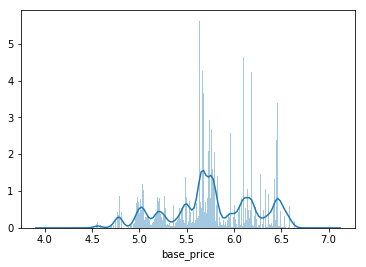

In [77]:
sns.distplot(np.log(all_df['base_price']), bins=500)
plt.show()

C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


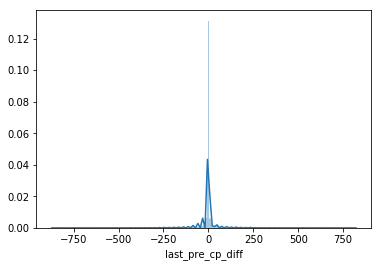

In [78]:
sns.distplot(all_df['last_pre_cp_diff'], bins=500)
plt.show()

In [82]:
all_df['discount_on_base'] = (all_df['base_price'] - all_df['checkout_price']) / all_df['base_price']

In [84]:
all_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine,b_c_p_diff,last_pre_cp_diff,price_increase,high_price_che_than_base,discount_on_base
0,1436842,1,10,1062,181.39,181.39,0,0,865.0,590,TYPE_B,6.3,Beverages,Italian,0.0,0.125974,False,False,0.000000
1,1205013,2,10,1062,183.36,182.36,0,0,782.0,590,TYPE_B,6.3,Beverages,Italian,-1.0,-1.970000,True,True,-0.005484
2,1447751,3,10,1062,184.36,182.36,0,0,851.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.000000,True,True,-0.010967
3,1014968,4,10,1062,182.36,183.36,0,0,1202.0,590,TYPE_B,6.3,Beverages,Italian,1.0,2.000000,False,False,0.005454
4,1003563,5,10,1062,183.39,181.39,0,0,958.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.030000,True,True,-0.011026


In [13]:
all_df['discount_on_base'] = (all_df['base_price'] - all_df['checkout_price']) / all_df['base_price']

In [85]:
all_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine,b_c_p_diff,last_pre_cp_diff,price_increase,high_price_che_than_base,discount_on_base
0,1436842,1,10,1062,181.39,181.39,0,0,865.0,590,TYPE_B,6.3,Beverages,Italian,0.0,0.125974,False,False,0.000000
1,1205013,2,10,1062,183.36,182.36,0,0,782.0,590,TYPE_B,6.3,Beverages,Italian,-1.0,-1.970000,True,True,-0.005484
2,1447751,3,10,1062,184.36,182.36,0,0,851.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.000000,True,True,-0.010967
3,1014968,4,10,1062,182.36,183.36,0,0,1202.0,590,TYPE_B,6.3,Beverages,Italian,1.0,2.000000,False,False,0.005454
4,1003563,5,10,1062,183.39,181.39,0,0,958.0,590,TYPE_B,6.3,Beverages,Italian,-2.0,-1.030000,True,True,-0.011026


C:\Users\nirav.gandhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


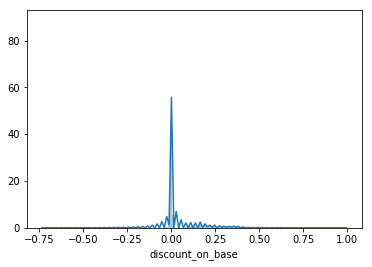

In [86]:
sns.distplot(all_df['discount_on_base'], bins=500)
plt.show()

In [87]:
all_df['neg_discount'] = (all_df['discount_on_base'] < 0).astype(int)

In [88]:
all_df['price_last_curr_diff'] = (all_df['checkout_price'].shift(1) - all_df['checkout_price']).fillna(1)/ all_df['checkout_price'].shift(1).fillna(1)

In [89]:
for _, r in all_df.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    all_df.loc[(all_df['center_id']==r['center_id']) & (all_df['meal_id']==r['meal_id']) & (all_df['week']==r['week']), 'price_last_curr_diff'] = all_df[(all_df['center_id']==r['center_id']) & (all_df['meal_id']==r['meal_id']) & (all_df['week']!=r['week'])]['price_last_curr_diff'].mean()

In [90]:
all_df['price_last_curr_diff'] = all_df['price_last_curr_diff'].fillna(0)

In [91]:
all_df['price_increase'] = (all_df['price_last_curr_diff'] < 0).astype(int)

In [92]:
all_df.loc[all_df['week'].isin(np.arange(136,146)), 'train_or_test'] = 'val'

In [93]:
all_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category,cuisine,b_c_p_diff,last_pre_cp_diff,price_increase,high_price_che_than_base,discount_on_base,neg_discount,price_last_curr_diff,train_or_test
0,1436842,1,10,1062,181.39,181.39,0,0,865.0,590,...,Beverages,Italian,0.0,0.125974,1,False,0.000000,0,-0.000748,NaN
1,1205013,2,10,1062,183.36,182.36,0,0,782.0,590,...,Beverages,Italian,-1.0,-1.970000,1,True,-0.005484,1,-0.010861,NaN
2,1447751,3,10,1062,184.36,182.36,0,0,851.0,590,...,Beverages,Italian,-2.0,-1.000000,1,True,-0.010967,1,-0.005454,NaN
3,1014968,4,10,1062,182.36,183.36,0,0,1202.0,590,...,Beverages,Italian,1.0,2.000000,0,False,0.005454,0,0.010848,NaN
4,1003563,5,10,1062,183.39,181.39,0,0,958.0,590,...,Beverages,Italian,-2.0,-1.030000,1,True,-0.011026,1,-0.005648,NaN
